In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

***EXERCISE 1***

1. Implementation of PCA.

In [50]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.variance = None
        self.mean = None
        self.cumulative_variance = None

    def fit(self, X):
        #we prepare the data by standardizing it
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        #we create the covariance matrix which is need for the eigenvalue decomp
        cov_matrix = np.cov(X.T)

        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        #take the principal components
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[idxs][:self.n_components]

        #calculate the variance from each component
        self.variance = eigenvalues[idxs][:self.n_components] / np.sum(eigenvalues)

        #calculate the cumulative variance
        self.cumulative_variance = np.cumsum(self.variance)

    def transform(self, X):
        #dot product the data and the principal components
        X = X - self.mean
        return np.dot(X, self.components.T), self.variance, self.cumulative_variance

The class PCA includes two functions, firstly the .fit() which intakes the data in matrix form, it standardises the data, then it creates a matrix with the covariance which is later used to crate the eigenvalues and eigenvectors. Finally, we obtain the eigenvectors, sort them and obtain the principal components from them. Additionally, we calculate the variance from each component. The second function .transform() intakes the data and projects the principal components onto our data using the dot product, in addition the variance is returned here. 

In [51]:
occu_train = np.loadtxt('OccupancyTrain.csv', delimiter=',')
occu_test = np.loadtxt('OccupancyTest.csv', delimiter=',')

In [52]:
X_occu_train = occu_train[:,:-1]
y_occu_train = occu_train[:,-1]
X_occu_test = occu_test[:,:-1]
y_occu_test = occu_test[:,-1]

In [53]:
weed_train = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
weed_test = np.loadtxt('IDSWeedCropTest.csv', delimiter=',')

In [54]:
X_weed_train = weed_train[:,:-1]
y_weed_train = weed_train[:,-1]
X_weed_test = weed_test[:,:-1]
y_weed_test = weed_test[:,-1]

In [55]:
print(type(occu_train))
occu_train.shape

<class 'numpy.ndarray'>


(600, 6)

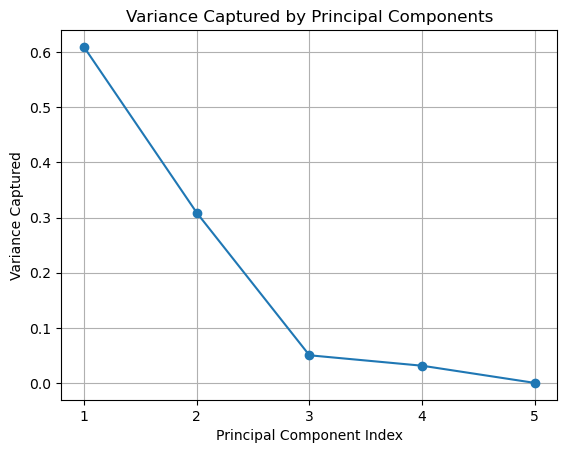

In [56]:
#we normalize the data as asked before applying pca
scaler = StandardScaler()
X_occu_train_scaled = scaler.fit_transform(X_occu_train)

#instantiate pca and fit
pca = PCA(n_components=X_occu_train_scaled.shape[1])
pca.fit(X_occu_train_scaled)

#transform data and obtain variance
X_occu_train_transformed, variance_trained, cumvar_trained = pca.transform(X_occu_train_scaled)

#Plot 
plt.plot(range(1, len(variance_trained) + 1), variance_trained, marker='o', linestyle='-')
plt.xlabel('Principal Component Index')
plt.ylabel('Variance Captured')
plt.title('Variance Captured by Principal Components')
plt.xticks(range(1, len(variance_trained) + 1))
plt.grid(True)
plt.show()

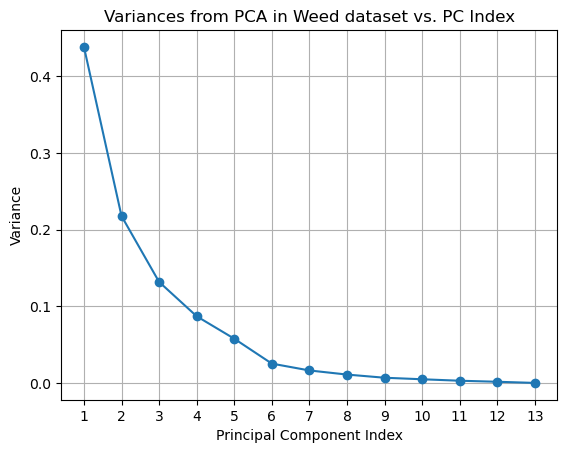

In [57]:
scaler = StandardScaler()
X_weed_train_scaled = scaler.fit_transform(X_weed_train)

#instantiate pca and fit
pca_weed = PCA(X_weed_train_scaled.shape[1])
pca_weed.fit(X_weed_train_scaled)

#transform data and obtain variance
X_weed_train_transformed, weed_variance_trained, cumvar_trained_weed = pca_weed.transform(X_weed_train_scaled)

#Plot variance vs PC index
plt.plot(range(1, len(weed_variance_trained) + 1), weed_variance_trained, marker='o')
plt.xlabel('Principal Component Index')
plt.ylabel('Variance')
plt.title('Variances from PCA in Weed dataset vs. PC Index')
plt.xticks(range(1, len(weed_variance_trained) + 1))
plt.grid(True)
plt.show()

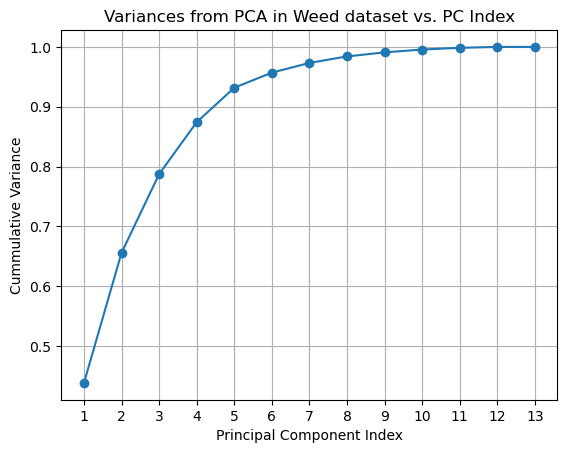

In [58]:
#plot the cumulative variance vs PC index
plt.plot(range(1, len(weed_variance_trained) + 1), cumvar_trained_weed, marker='o')
plt.xlabel('Principal Component Index')
plt.ylabel('Cummulative Variance')
plt.title('Variances from PCA in Weed dataset vs. PC Index')
plt.xticks(range(1, len(weed_variance_trained) + 1))
plt.grid(True)
plt.show()

In [63]:
pcs_for_90 = np.where(cumvar_trained_weed > 0.9)[0] + 1 # +1 because the index starts at 0
pcs_for_95 = np.where(cumvar_trained_weed > 0.95)[0] + 1

print("Number of principal components needed to capture 90% of the variance:", pcs_for_90[0])
print("Number of principal components needed to capture 95% of the variance:", pcs_for_95[0])

Number of principal components needed to capture 90% of the variance: 5
Number of principal components needed to capture 95% of the variance: 6


***EXERCISE 2***

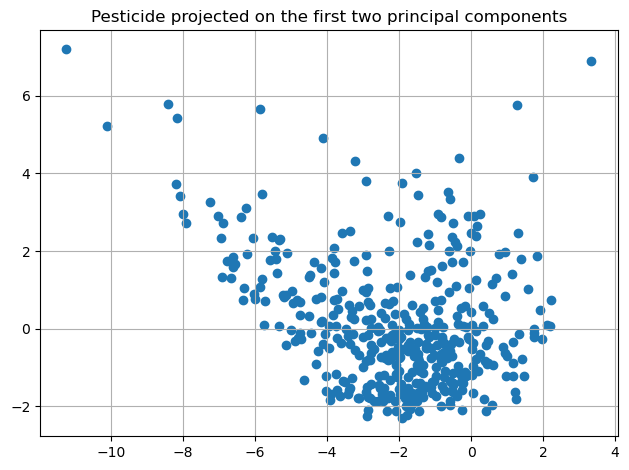

In [100]:
pca_2comp = PCA(n_components=2)
pca_2comp.fit(X_weed_train_scaled)

X_weed_train_transformed_2comp, _ , _ = pca_2comp.transform(X_weed_train_scaled)

plt.scatter(X_weed_train_transformed_2comp[y_weed_train == 0, 0], X_weed_train_transformed_2comp[y_weed_train == 0, 1])
plt.title('Pesticide projected on the first two principal components')
plt.tight_layout()
plt.grid(True)
plt.show()

As my class PCA allows for the selection of the number of components, I just setted it up for 2 components, then fitted the model with the scaled data from the weed dataset. Then after that I used a scatterplot to project the two components 

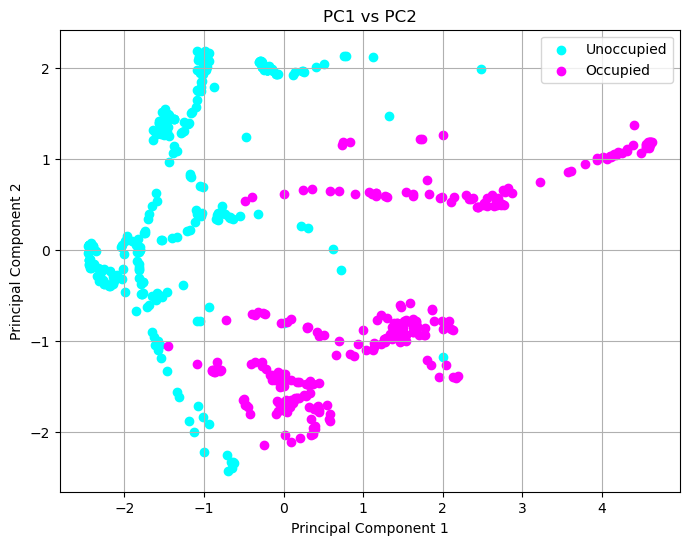

In [95]:
pca_2comp = PCA(n_components=2)
pca_2comp.fit(X_occu_train_scaled)

X_occu_train_transformed_2comp , _ , _ = pca_2comp.transform(X_occu_train_scaled)

plt.figure(figsize=(8, 6))

plt.scatter(X_occu_train_transformed[y_occu_train == 0, 0], 
            X_occu_train_transformed[y_occu_train == 0, 1], 
            label='Unoccupied', color='cyan', alpha=1)

plt.scatter(X_occu_train_transformed[y_occu_train == 1, 0], 
            X_occu_train_transformed[y_occu_train == 1, 1], 
            label='Occupied', color='magenta', alpha=1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC1 vs PC2')
plt.legend()
plt.grid(True)
plt.show()

***EXERCISE 3***